In [2]:
# Global imports
import sys, os
import re
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from collections import Counter, OrderedDict

%matplotlib inline 
#%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
#plt.style.use(['dark_background'])

import numpy as np
import json
import collections
from scipy import stats
import random
import math
from datetime import datetime
import csv

# Local import
sys.path.insert(0, '/home/mvasist/scripts/assessment/training/methods/')
# Import the neural network architectures:
from MLP import Net as MLP
from CNN import Net as CNN

sys.path.insert(0, '/home/mvasist/scripts/assessment/training/src/')
from dataset import spectrum_dataset, splitDataLoader, ToTensor, Normalize

In [3]:
pwd

'/home/mvasist/scripts/assessment/evaluation'

# User-defined parameters

In [4]:
working_dir = "/home/mvasist/scripts/assessment/"
path_to_models = working_dir+'models/'
path_to_datasets = working_dir+"datasets/"


dl_arch = 'mlp'
# nb_layer = 2
train_val_dataset_size = 10000
optimizer_name =  "Adam" 
batch_size = 128 
learning_rate = '1e-4' 
nb_epoch = 100
metric = 'bce'
split_train = '90'

test_dataset_size = 90

In [5]:
model_file_name = 'model_'+str(train_val_dataset_size)+'spectrum_'+dl_arch+'_bs'+str(batch_size)+'_lr'+\
    str(learning_rate)+'_'+str(nb_epoch)+'ep_opt'+str(optimizer_name)+'_split'+split_train+'_'+metric
model_file_name 

'model_10000spectrum_mlp_bs128_lr1e-4_100ep_optAdam_split90_bce'

# Display the training and validation losses

## Read the train/val losses

In [6]:
# if dl_arch == 'mlp':
#     layer_str = '_2hl_'
# elif dl_arch == 'cnn':
#     layer_str = '_3cv_'
# else:
#     raise ValueError("the model name specified is not valid")

model_name = 'model_'+str(train_val_dataset_size)+'spectrum_'+dl_arch+'_bs'+str(batch_size)+\
'_lr'+str(learning_rate)+'_'+str(nb_epoch)+'ep_opt'+str(optimizer_name)+'_split'+split_train+'_'+metric

metrics_file = '/home/mvasist/scripts/assessment/models/'+model_name+'/metrics.json'

with open(metrics_file) as json_file:
    data = json.load(json_file)
    
#model_10000spectrum_mlp_bs32_lr1e-4_100ep_optAdam_split90_mse

In [7]:
## reading from the csv file saved from the terminal

# c= path_to_models+model_name
# t=[]
# v=[]

# with open(c+'/logs_terminal.txt', newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     for i, row in enumerate(spamreader):
#         if (i%4) == 0:
#             t.append(float(row[3]))
#         if (i-1)%4 ==0 :
#             v.append(float(row[3]))
        

## Plot the losses

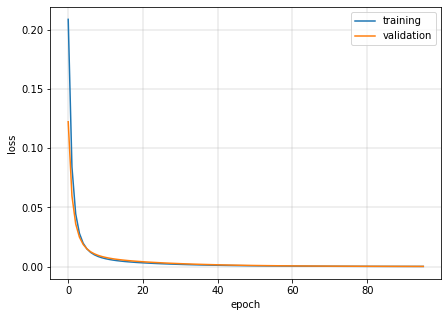

In [8]:
fig = plt.figure(1, figsize=(7,5))
plt.plot(data['train_loss'], label='training') # t
plt.plot(data['val_loss'], label='validation') # v
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.grid(linewidth=0.4)

In [9]:
print(np.min(data['train_loss']))   # t
print(np.min(data['val_loss']))   #  v

7.706013307945467e-05
0.00011087541163244562


# Load the model

In [17]:
#Load model architecture:

if dl_arch == 'mlp':
    model = MLP(375, 1)
    layer_str = '_2hl_'
elif dl_arch == 'cnn':
    model = CNN(1, 2)
    layer_str = '_3cv_'
else:
    raise ValueError("the model name specified is not valid")

model_file = path_to_models+'model_'+str(train_val_dataset_size)+'spectrum_'+dl_arch+'_bs'+str(batch_size)+'_lr'+\
    str(learning_rate)+'_'+str(nb_epoch)+'ep_opt'+str(optimizer_name)+'_split'+split_train+'_'+metric+'_'+'/model.pth'

assert os.path.isfile(model_file), "{} does not exist".format(model_file)
#print("Model file name: {}\n".format(model_file))

state_dict = torch.load(model_file, map_location='cpu')
#print(state_dict.keys())
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v

# # load params
# model.load_state_dict(new_state_dict)

try:
    model.load_state_dict(new_state_dict)
except RuntimeError as e:
    print('Ignoring "' + str(e) + '"')

# model.load_state_dict(state_dict)

# Create the dataset object

We apply the same transformations to the test dataset than to the training/validation set

In [18]:
# Define name of the hdf5 file containing the test data:
test_file = path_to_datasets+"4params_test_mse.h5"

assert os.path.isfile(test_file), "{} does not exist".format(test_file)
print("Test dataset filename: {}".format(test_file))  

transfo = transforms.Compose([Normalize(), ToTensor()])

# Create the dataset object:xc
test_dataset = spectrum_dataset(path_to_file = test_file, 
                          size = test_dataset_size,
                          transform = transfo)

Test dataset filename: /home/mvasist/scripts/assessment/datasets/4params_test_mse.h5


# Perform predictions

In [20]:
prediction_list = []
ratio_list = []
rmse_list = []
for id in range(test_dataset_size):
    
    sample = test_dataset[id]

    LtEratio = sample['target'].numpy()
    specparam = sample['input'].unsqueeze(0)

    prediction = model(specparam).detach().numpy()[0]
    
    prediction_list.append(prediction)
    ratio_list.append(LtEratio)

In [21]:
for i in range(test_dataset_size):
    print("id={}".format(i))
    print(prediction_list[i])
    print(ratio_list[i])
    print()

id=0
[[1.]]
[1. 0.]

id=1
[[1.]]
[1. 0.]

id=2
[[1.]]
[1. 0.]

id=3
[[1.]]
[1. 0.]

id=4
[[1.]]
[1. 0.]

id=5
[[1.]]
[1. 0.]

id=6
[[1.]]
[1. 0.]

id=7
[[1.]]
[1. 0.]

id=8
[[1.]]
[1. 0.]

id=9
[[1.]]
[1. 0.]

id=10
[[1.]]
[1. 0.]

id=11
[[1.]]
[1. 0.]

id=12
[[1.]]
[1. 0.]

id=13
[[1.]]
[1. 0.]

id=14
[[1.]]
[1. 0.]

id=15
[[1.]]
[1. 0.]

id=16
[[1.]]
[1. 0.]

id=17
[[1.]]
[1. 0.]

id=18
[[1.]]
[1. 0.]

id=19
[[1.]]
[1. 0.]

id=20
[[1.]]
[1. 0.]

id=21
[[1.]]
[1. 0.]

id=22
[[1.]]
[1. 0.]

id=23
[[1.]]
[1. 0.]

id=24
[[1.]]
[1. 0.]

id=25
[[1.]]
[1. 0.]

id=26
[[1.]]
[1. 0.]

id=27
[[0.99718803]]
[1. 0.]

id=28
[[1.]]
[1. 0.]

id=29
[[1.]]
[1. 0.]

id=30
[[1.]]
[1. 0.]

id=31
[[1.]]
[1. 0.]

id=32
[[1.]]
[1. 0.]

id=33
[[1.]]
[1. 0.]

id=34
[[1.]]
[1. 0.]

id=35
[[1.]]
[1. 0.]

id=36
[[1.]]
[1. 0.]

id=37
[[1.]]
[1. 0.]

id=38
[[1.]]
[1. 0.]

id=39
[[1.]]
[1. 0.]

id=40
[[1.]]
[1. 0.]

id=41
[[1.]]
[1. 0.]

id=42
[[1.]]
[1. 0.]

id=43
[[1.]]
[1. 0.]

id=44
[[1.]]
[1. 0.]

id=45
[[1.]]

# Evaluation metrics

In [22]:
pred = np.array(prediction_list)
truth = np.array(ratio_list)

### Compute the MSE

In [23]:
mse = np.mean((pred - truth)**2)
print(mse)

0.4998445


### Compute the RMSE

In [24]:
rmse = np.sqrt(np.mean((pred - truth)**2))
print(rmse)

0.7069968


### Compute the MAE

In [25]:
mae = np.mean(np.abs(pred - truth))
print(mae)

0.5
